Clustering - Breast Cancer Gene Expression Profiles (METABRIC)

In [12]:
!pip install pycaret
# Install necessary packages (only if needed in Colab)
!pip install pandas scikit-learn matplotlib

# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Load the dataset from the uploaded file in Colab
data = pd.read_csv('/content/mutation.csv')

In [14]:
# Impute numerical columns with their median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Impute categorical columns with their mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [15]:
# Convert categorical variables into numerical values using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


In [16]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_predictions = kmeans.fit_predict(data_scaled)


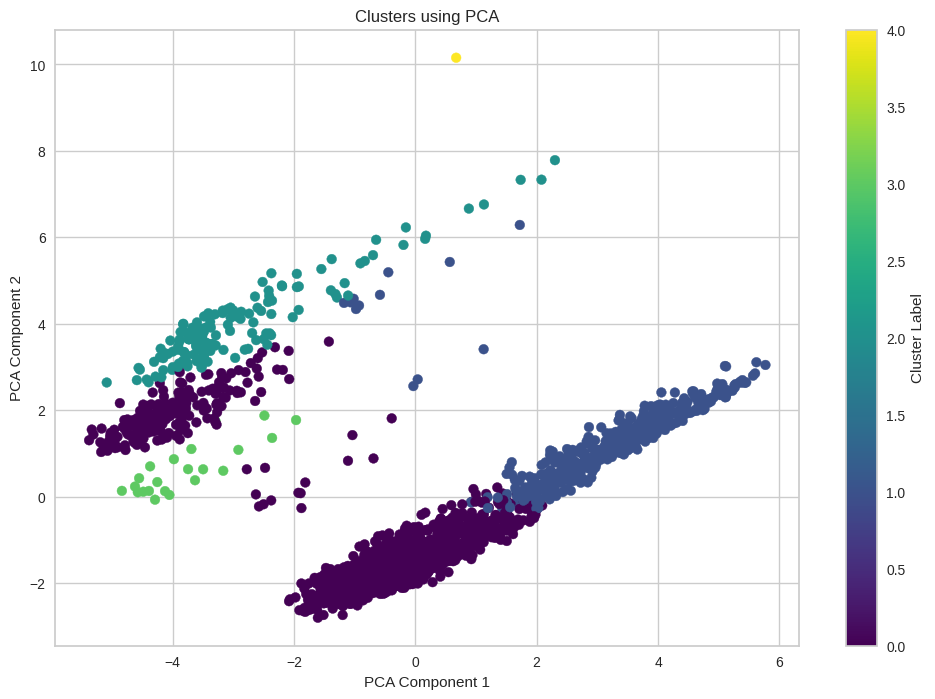

In [17]:
# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=cluster_predictions, cmap='viridis', label='Clusters')
plt.colorbar().set_label('Cluster Label')
plt.title('Clusters using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Anomaly Detection - Breast Cancer Gene Expression Profiles (METABRIC)

In [6]:
# Install necessary packages (only if needed in Colab)
!pip install pandas scikit-learn matplotlib

# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
# Load the dataset from the uploaded file in Colab
data = pd.read_csv('/content/mutation.csv')

In [8]:
# Impute numerical columns with their median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Impute categorical columns with their mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
# Convert categorical variables into numerical values using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


In [10]:
# Train the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)
anomaly_predictions = clf.fit_predict(data_scaled)

# Convert anomaly predictions to a boolean array (True for anomalies)
anomalies = anomaly_predictions == -1

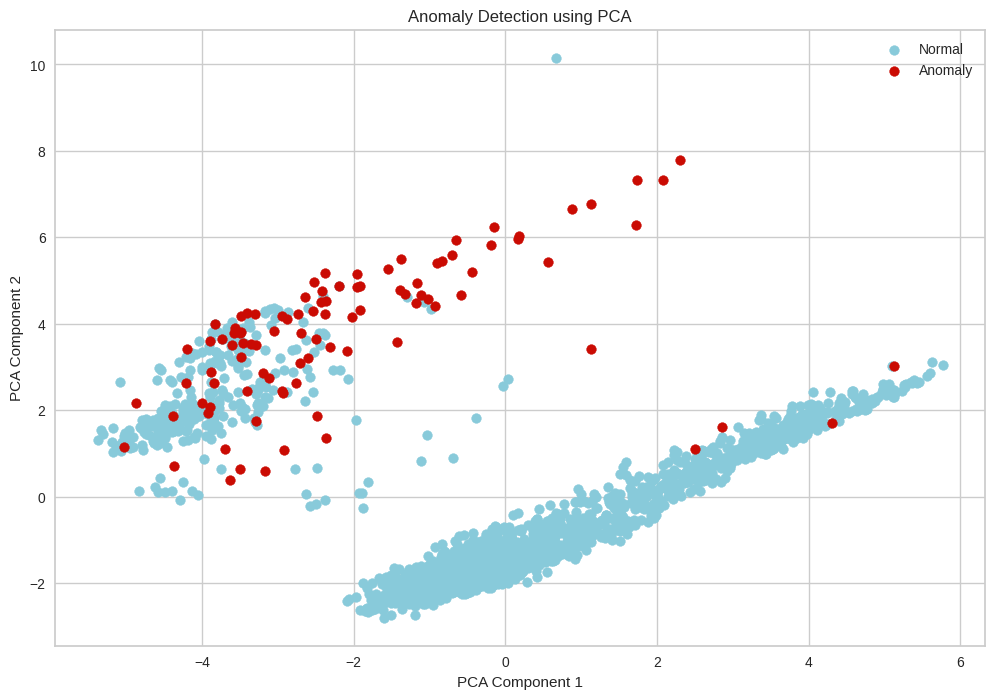

In [11]:
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_scaled)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(data_2d_pca[~anomalies, 0], data_2d_pca[~anomalies, 1], c='c', label='Normal')
plt.scatter(data_2d_pca[anomalies, 0], data_2d_pca[anomalies, 1], c='r', label='Anomaly')
plt.title('Anomaly Detection using PCA')
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
